In [1]:
%matplotlib inline
import yt
import yt.fields.vector_operations
from yt.units import dimensions, kboltz, mp
import os, sys, glob, errno
import matplotlib as mpl
#mpl.use("agg")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import Locator
from scipy.interpolate import spline
import operator
import h5py
sys.path.append("../")

#import magnolia

In [2]:
from yt.visualization.base_plot_types import get_multi_plot
import matplotlib.colorbar as cb
from matplotlib.colors import LogNorm

fn1 = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0000"
fn2 = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0070"
fn3 = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0150"
fn4 = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0250"
fn5 = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0350"
fn6 = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0500"

fn1_plt = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_part_0000"
fn2_plt = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_part_0070"
fn3_plt = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_part_0150"
fn4_plt = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_part_0250"
fn5_plt = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_part_0350"
fn6_plt = "/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_part_0500"

orient = 'horizontal'

ds1 = yt.load(fn1)
ds2 = yt.load(fn2)
ds3 = yt.load(fn3)
ds4 = yt.load(fn4)
ds5 = yt.load(fn5)
ds6 = yt.load(fn6)

ds1_plt = yt.load(fn1)
ds2_plt = yt.load(fn2)
ds3_plt = yt.load(fn3)
ds4_plt = yt.load(fn4)
ds5_plt = yt.load(fn5)
ds6_plt = yt.load(fn6)

yt : [INFO     ] 2018-06-11 14:50:26,661 Particle file found: fiducial_1to1_b0_mag_hdf5_part_0000
yt : [INFO     ] 2018-06-11 14:50:26,726 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-06-11 14:50:26,727 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-06-11 14:50:26,729 Parameters: domain_left_edge          = [-2.2e+25 -2.2e+25 -2.2e+25]
yt : [INFO     ] 2018-06-11 14:50:26,730 Parameters: domain_right_edge         = [2.2e+25 2.2e+25 2.2e+25]
yt : [INFO     ] 2018-06-11 14:50:26,731 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-06-11 14:50:27,109 Particle file found: fiducial_1to1_b0_mag_hdf5_part_0070
yt : [INFO     ] 2018-06-11 14:50:27,173 Parameters: current_time              = 4.41924147874186e+16
yt : [INFO     ] 2018-06-11 14:50:27,173 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-06-11 14:50:27,175 Parameters: domain_left_edge          = [-2.2e+25 -2.2e+25 -2.2e+25]
yt : [INFO     ] 2018

yt : [INFO     ] 2018-05-31 16:11:56,409 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2018-05-31 16:11:56,410 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2018-05-31 16:11:56,412 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2018-05-31 16:11:56,412 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2018-05-31 16:11:56,414 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-05-31 16:12:04,799 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2018-05-31 16:12:04,800 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2018-05-31 16:12:04,802 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2018-05-31 16:12:04,803 ylim = -22000000000000000704643

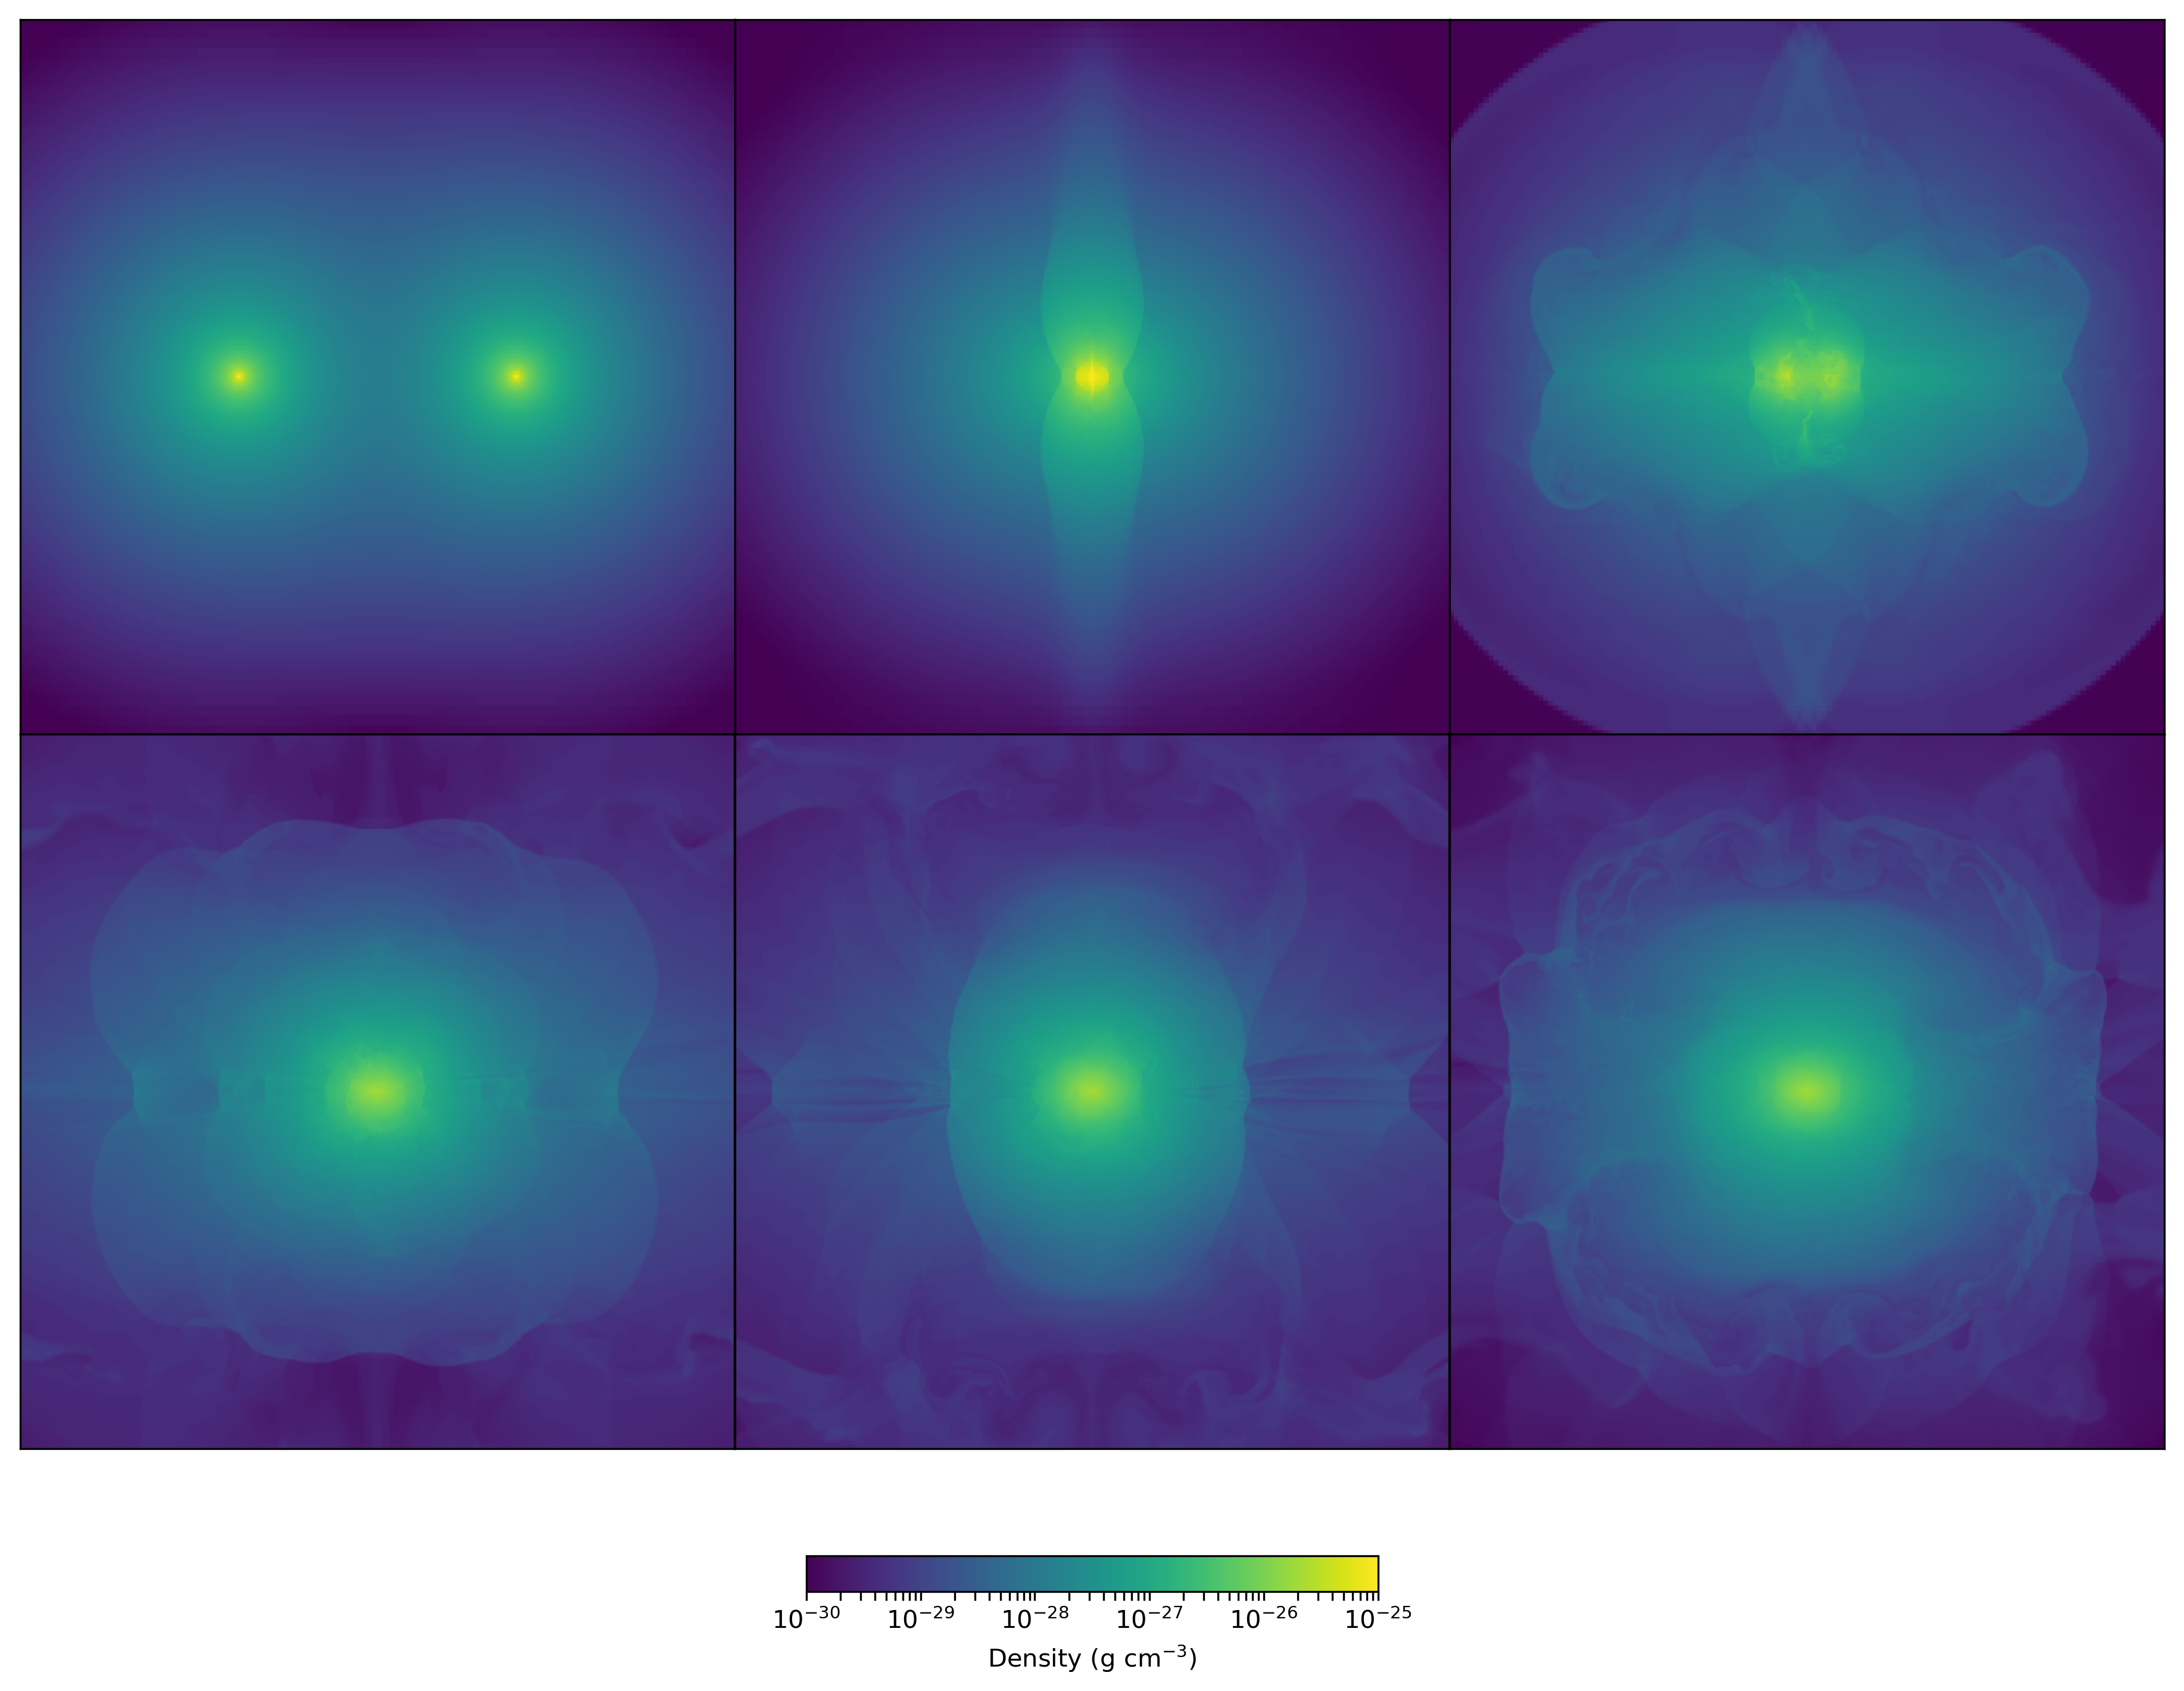

In [3]:
plt.close('all')

# There's a lot in here:
#   From this we get a containing figure, a list-of-lists of axes into which we
#   can place plots, and some axes that we'll put colorbars.
# We feed it:
#   Number of plots on the x-axis, number of plots on the y-axis, and how we
#   want our colorbars oriented.  (This governs where they will go, too.
#   bw is the base-width in inches, but 4 is about right for most cases.
fig, axes, colorbars = get_multi_plot(3, 2, colorbar=orient, bw = 4)

slc1 = yt.SlicePlot(ds1, 'z', fields=["density"])
slc2 = yt.SlicePlot(ds2, 'z', fields=["density"])
slc3 = yt.SlicePlot(ds3, 'z', fields=["density"])
slc4 = yt.SlicePlot(ds4, 'z', fields=["density"])
slc5 = yt.SlicePlot(ds5, 'z', fields=["density"])
slc6 = yt.SlicePlot(ds6, 'z', fields=["density"])

for slc in [slc1,slc2,slc3,slc4,slc5,slc6]:
    slc.annotate_timestamp(redshift=False,draw_inset_box=True)

slc_frb1 = slc1.data_source.to_frb((8.0, "Mpc"), 512)
slc_frb2 = slc2.data_source.to_frb((8.0, "Mpc"), 512)
slc_frb3 = slc3.data_source.to_frb((8.0, "Mpc"), 512)
slc_frb4 = slc4.data_source.to_frb((8.0, "Mpc"), 512)
slc_frb5 = slc5.data_source.to_frb((8.0, "Mpc"), 512)
slc_frb6 = slc6.data_source.to_frb((8.0, "Mpc"), 512)

col1 = [axes[0][0], axes[1][0]]
col2 = [axes[0][1], axes[1][1]]
col3 = [axes[0][2], axes[1][2]]

for ax1, ax2, ax3 in zip(col1, col2, col3) :

    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)

# Converting our Fixed Resolution Buffers to numpy arrays so that matplotlib
# can render them

slc_1 = np.array(slc_frb1['density'])
slc_2 = np.array(slc_frb2['density'])
slc_3 = np.array(slc_frb3['density'])
slc_4 = np.array(slc_frb4['density'])
slc_5 = np.array(slc_frb5['density'])
slc_6 = np.array(slc_frb6['density'])

plots = [col1[0].imshow(slc_1, origin='lower', norm=LogNorm()),
         col1[1].imshow(slc_4, origin='lower', norm=LogNorm()),
         col2[0].imshow(slc_2, origin='lower', norm=LogNorm()),
         col2[1].imshow(slc_5, origin='lower', norm=LogNorm()),
         col3[0].imshow(slc_3, origin='lower', norm=LogNorm()),
         col3[1].imshow(slc_6, origin='lower', norm=LogNorm())]

for plot in plots:
    plot.set_clim((1.0e-30,1.0e-25))
    # plot.set_cmap("bds_highcontrast")
    
titles=[r'$\mathrm{Density}\ (\mathrm{g\ cm^{-3}})$']

for p, cax, t in zip([plots[2]], [colorbars[1]], titles):
    cbar = fig.colorbar(p, cax=cax, orientation=orient)
    cbar.set_label(t)
    
for p, cax, t in zip([plots[0], plots[4]], 
                     [colorbars[0],colorbars[2]], 
                     [r'$\mathrm{Density}\ (\mathrm{g\ cm^{-3}})$',
                      r'$\mathrm{Density}\ (\mathrm{g\ cm^{-3}})$']):
    cbar = fig.colorbar(p, cax=cax, orientation=orient)
    cbar.remove()

# And now we're done!
#fig.savefig("%s_3x2" % ds)
fig

In [5]:
from mpl_toolkits.axes_grid1 import AxesGrid

def make_multiplot(field,zlim1,zlim2,cmap,output_fn):

    plt.close('all')

    #fns = ['Enzo_64/DD0005/data0005','Enzo_64/DD0015/data0015', 'Enzo_64/DD0025/data0025', 'Enzo_64/DD0035/data0035']
    fns = [fn1,fn2,fn3,fn4,fn5,fn6]
    if field == ('deposit', 'all_cic'):
        fns = [fn1_plt,fn2_plt,fn3_plt,fn4_plt,fn5_plt,fn6_plt]

    # font = {'family' : 'stix',
    #         'size'   : 14}

    #mpl.rc('font', **font)

    fig = plt.figure()

    # See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
    # These choices of keyword arguments produce a four panel plot with a single
    # shared narrow colorbar on the right hand side of the multipanel plot. Axes
    # labels are drawn for all plots since we're slicing along different directions
    # for each plot.
    grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                    nrows_ncols = (2, 3),
                    axes_pad = 0.05,
                    label_mode = "1",
                    share_all = True,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="3%",
                    cbar_pad="0%")

    for i, fn in enumerate(fns):
        # Load the data and create a single plot
        ds = yt.load(fn) # load data
        slc = yt.SlicePlot(ds, 'z', [field], width=(8,'Mpc'))
        # slc.set_font_size(12)
        #slc.set_font({'family': 'serif', 'size':12})
        #slc.set_minorticks('density', 'on')

        slc.set_font({'family':'dejavuserif', 'size':14})

        # Ensure the colorbar limits match for all plots
        #slc.set_zlim(field, 1.0e-30, 1.0e-25)
        slc.set_zlim(field, zlim1, zlim2)
        slc.set_cmap(field=field, cmap=cmap)
        if field == ('deposit', 'all_cic'):
            slc.set_log("all_cic", True)
        slc.annotate_timestamp(redshift=False,draw_inset_box=False)

        # This forces the ProjectionPlot to redraw itself on the AxesGrid axes.
        plot = slc.plots[field]
        plot.figure = fig
        plot.axes = grid[i].axes
        plot.cax = grid.cbar_axes[i]

        # Finally, this actually redraws the plot.
        slc._setup_plots()

    plt.gcf().subplots_adjust(right=0.15)
    plt.savefig(output_fn, bbox_inches='tight')
    # plt.tight_layout()
    # plt.savefig('multiplot.pdf', bbox_inches='tight')
    plt.show()

yt : [INFO     ] 2018-06-11 14:51:07,771 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-06-11 14:51:07,772 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-06-11 14:51:07,773 Parameters: domain_left_edge          = [-2.2e+25 -2.2e+25 -2.2e+25]
yt : [INFO     ] 2018-06-11 14:51:07,774 Parameters: domain_right_edge         = [2.2e+25 2.2e+25 2.2e+25]
yt : [INFO     ] 2018-06-11 14:51:07,776 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-06-11 14:51:07,784 Allocating for 1.100e+07 particles (index particle type 'all')
yt : [INFO     ] 2018-06-11 14:51:30,214 Identified 6.658e+05 octs
yt : [INFO     ] 2018-06-11 14:51:39,235 xlim = -4.000000 4.000000
yt : [INFO     ] 2018-06-11 14:51:39,236 ylim = -4.000000 4.000000
yt : [INFO     ] 2018-06-11 14:51:39,237 xlim = -4.000000 4.000000
yt : [INFO     ] 2018-06-11 14:51:39,238 ylim = -4.000000 4.000000
yt : [INFO     ] 2018-06-11 14:51:39,239 Making a fixed resolution buffer of (('depos

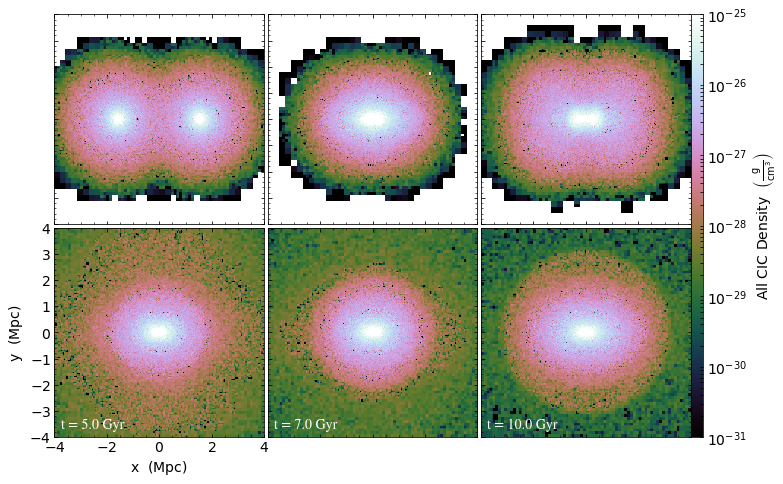

In [6]:
# make_multiplot('density',1.0e-30,1.0e-25,'arbre','1to1_b0_density_multiplot.pdf')
# make_multiplot('magnetic_field_strength',1e-10,1e-5,'arbre','1to1_b0_magnetic_field_strength_multiplot.pdf')
# make_multiplot('kT',0.5,20,'algae','1to1_b0_kT_multiplot.pdf')
make_multiplot(('deposit', 'all_cic'),1e-31,1e-25,'cubehelix','1to1_b0_all_cic_multiplot.pdf')

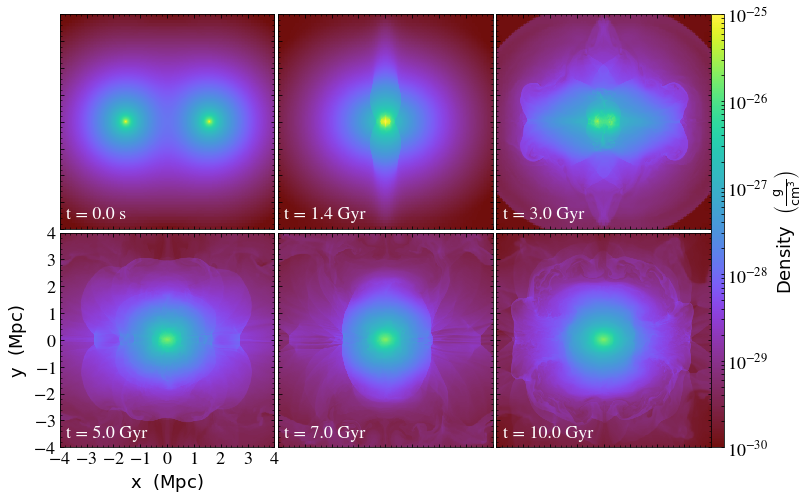

In [12]:
fig

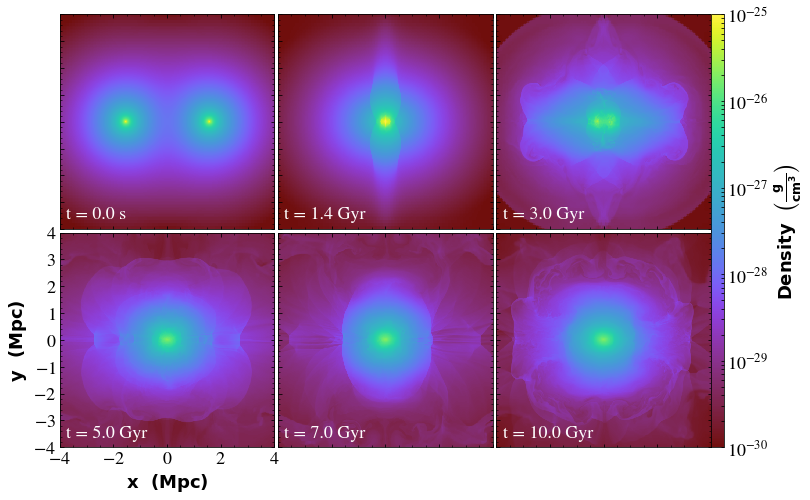

In [32]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)  
plt.rcParams["axes.labelsize"] = 50
fig

<Figure size 432x288 with 0 Axes>